In [1]:
!pip install -U fastai gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211

In [2]:
from fastai.vision.all import *
import torch
import os

# A.1. Download the Data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zeynepsudebal","key":"edff0c78357910eb69832c4403717164"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 83% 124M/149M [00:00<00:00, 1.29GB/s]
100% 149M/149M [00:00<00:00, 1.20GB/s]


In [7]:
!unzip -q brain-tumor-mri-dataset.zip

In [8]:
dataset_path = Path('/content/Training')
dataset_path.ls()

(#4) [Path('/content/Training/glioma'),Path('/content/Training/meningioma'),Path('/content/Training/notumor'),Path('/content/Training/pituitary')]

In [9]:
# Install Python 3.10
!sudo apt-get update -y
!sudo apt-get install python3.10

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,726 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,363 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,946 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.n

In [10]:
# Set Python 3.10 as default (in this notebook session only)
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --set python3 /usr/bin/python3.10

update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode


In [11]:
# Check version
!python3 --version

Python 3.10.12


## A.1.1. Inspect the Data Layout

In [12]:
# Check tumor classes
tumor_classes = dataset_path.ls()
print("Tumor Types:", [x.name for x in tumor_classes])

# Count images in each class
for folder in tumor_classes:
    print(f"{folder.name}: {len(get_image_files(folder))} images")

# Preview sample images
get_image_files(dataset_path)[:5]

Tumor Types: ['glioma', 'meningioma', 'notumor', 'pituitary']
glioma: 1321 images
meningioma: 1339 images
notumor: 1595 images
pituitary: 1457 images


(#5) [Path('/content/Training/glioma/Tr-gl_0434.jpg'),Path('/content/Training/glioma/Tr-gl_0742.jpg'),Path('/content/Training/glioma/Tr-gl_0531.jpg'),Path('/content/Training/glioma/Tr-gl_0612.jpg'),Path('/content/Training/glioma/Tr-gl_0384.jpg')]

# A.2. Create the DataBlock and Dataloaders
## A.2.1. Define the Blocks
* ImageBlock tells FastAI that the inputs are images.

* CategoryBlock means the output (labels) are categorical, such as 'glioma_tumor', 'meningioma_tumor', and so on.

  * blocks = (ImageBlock, CategoryBlock)
## A.2.2 Define the Means of Getting Data into DataBlock
* This function tells FastAI where to look for the image files.

* It will collect all .jpg images under the root folder (and subfolders).

  * get_items = get_image_files
## A.2.3. Define How to Get the Attributes (Labels)
* FastAI get the label by reading its parent folder name for each image.
  * get_y = parent_label
## A.2.4 Define Data Transformations
Item Transformations (item_tfms):
* This presizes each image to a standard shape before batching.

* Presizing helps avoid issues when rotating, cropping, or augmenting later.

* Resize to something bigger than final size (e.g., 460 before 224).

Batch Transformations (batch_tfms):
* These are applied to batches during training.

* aug_transforms(size=224):

    * Includes rotation, flipping, warping, zooming, cropping, etc.

* Normalize.from_stats(*imagenet_stats):

    * Normalizes RGB values to match what the pre-trained model expects (same stats as ImageNet)
      
        item_tfms = Resize(460)
        batch_tfms = [*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]


## The Full DataBlock Setup

In [13]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),                     # A.2.1
    get_items = get_image_files,                              # A.2.2
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),    # Validation split
    get_y = parent_label,                                     # A.2.3
    item_tfms = Resize(460),                                  # A.2.4 (presizing)
    batch_tfms = [*aug_transforms(size = 224),                # A.2.4 (augmentation)
                Normalize.from_stats(*imagenet_stats)]        # A.2.4 (normalization)
)

dls = dblock.dataloaders(dataset_path, bs = 32)

# A.3. Inspect the DataBlock via Dataloader
## A.3.1. Show Batch: dataloader.show_batch()

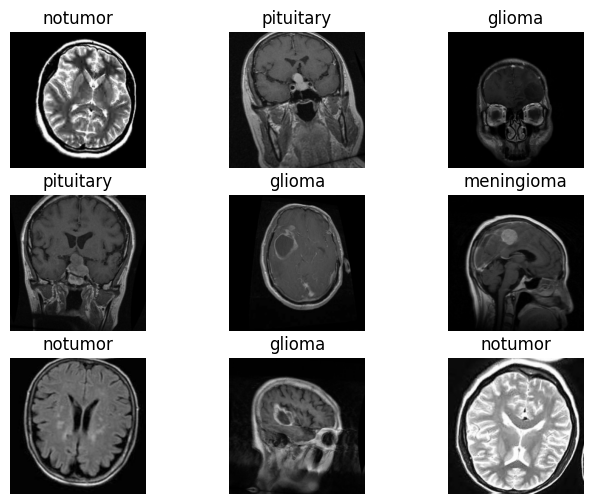

In [14]:
# Show a batch of 9 images with labels
dls.show_batch(max_n = 9, figsize = (8, 6))

## A.3.2. Check the Labels

In [15]:
print("Classes:", dls.vocab)
print("Number of classes:", len(dls.vocab))

Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of classes: 4


## A.3.3. Summarize the DataBlock: dataloader.summary(path/data)

In [16]:
dblock.summary(dataset_path)

Setting-up type transforms pipelines
Found 5712 items
2 datasets of sizes 4570,1142
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      /content/Training/meningioma/Tr-me_1322.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=512x512
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      /content/Training/meningioma/Tr-me_1322.jpg
    applying parent_label gives
      meningioma
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=512x512, TensorCategory(1))


Found 5712 items
2 datasets of sizes 4570,1142
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Setting up after_item: Pipeline

# A.4. Train a Simple Model

In [17]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 186MB/s]


In [18]:
print("\nTraining for 4 epochs:")
learn.fine_tune(4)


Training for 4 epochs:


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.721767,0.380219,0.127846,0.872154,00:45


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.380875,0.199038,0.070053,0.929947,00:45
1,0.220500,0.129772,0.052539,0.947461,00:47
2,0.124363,0.079728,0.032399,0.967601,00:46
3,0.066920,0.064094,0.024518,0.975482,00:46


In [19]:
learn.export('resnet34-brain-tumor-classifier.pkl')

### Interpret the model

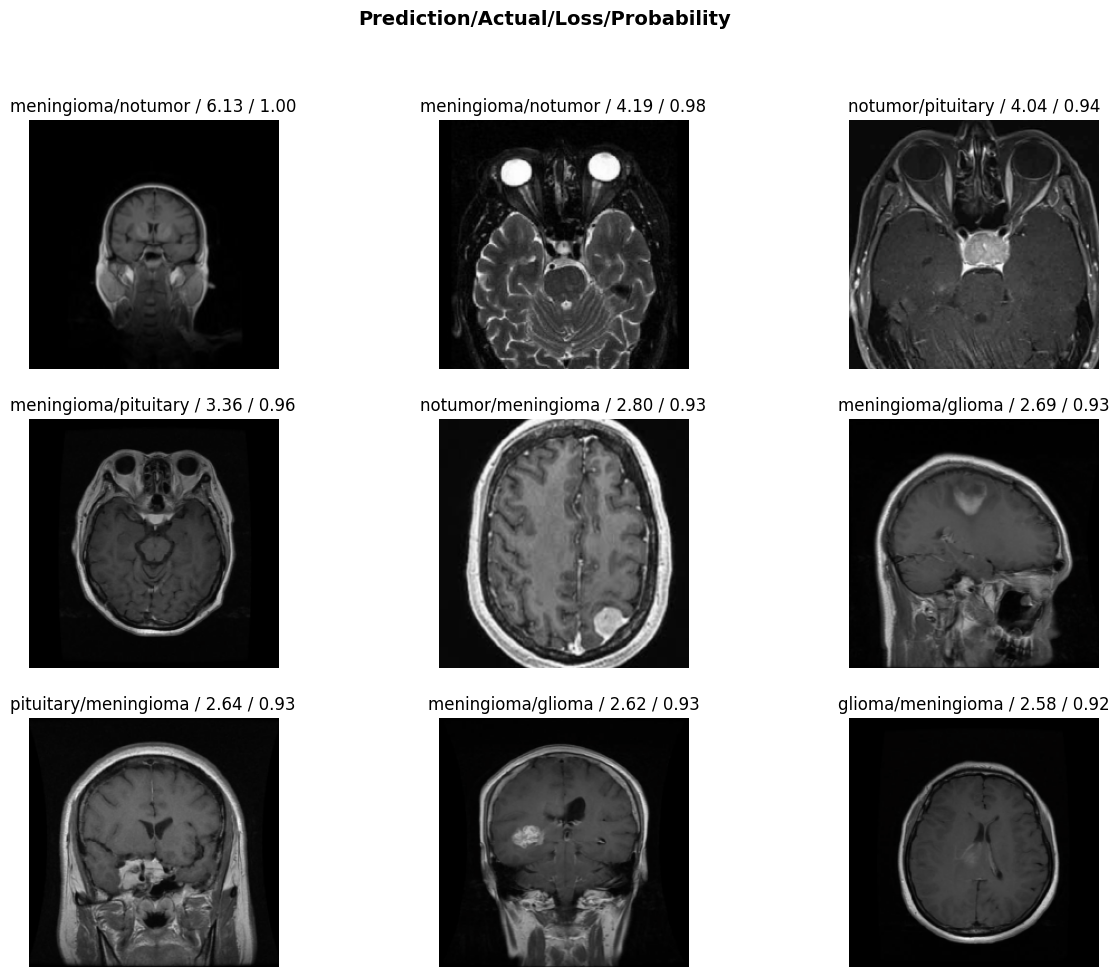

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

### Confusion Matrix

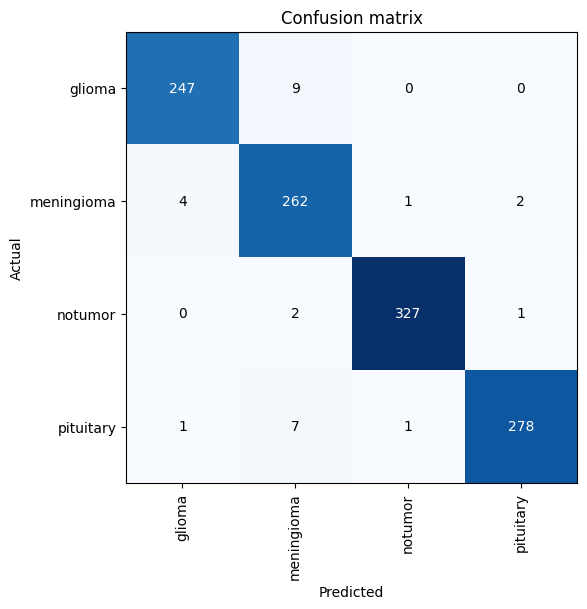

In [21]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=100)

# B.1. Learning Rate Finder

Suggested learning rate: 7.585775847473997e-08


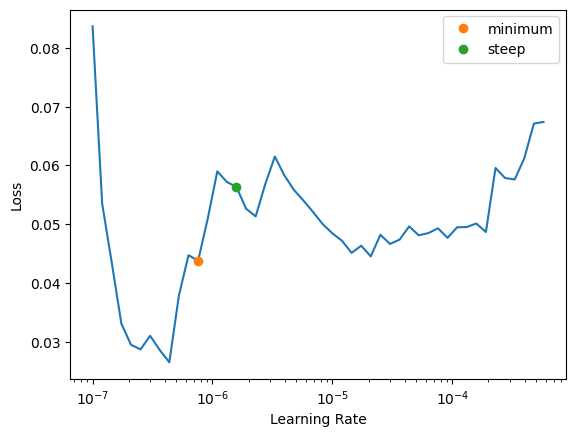

In [24]:
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

print(f"Suggested learning rate: {lr_min}")

In [25]:
print(f"\nLearning rate finder results:")
print(f"Suggested learning rate: {lr_min:.2e}")
print(f"- Too high LR (> ~{lr_min*10:.2e}): Loss would likely diverge (poor convergence)")
print(f"- Too low LR (< ~{lr_min/100:.2e}): Training would be very slow, risking overfitting")


Learning rate finder results:
Suggested learning rate: 7.59e-08
- Too high LR (> ~7.59e-07): Loss would likely diverge (poor convergence)
- Too low LR (< ~7.59e-10): Training would be very slow, risking overfitting


In [26]:
print("\nImplementing Transfer Learning:")
print("Understanding the final linear layer replacement:")

# Get number of classes
num_classes = len(dls.vocab)
print(num_classes)


Implementing Transfer Learning:
Understanding the final linear layer replacement:
4


In [27]:
# Create the model
learn = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s]


The model is frozen by default in fastai's vision_learner


Running LR finder for frozen model (training only final layer):


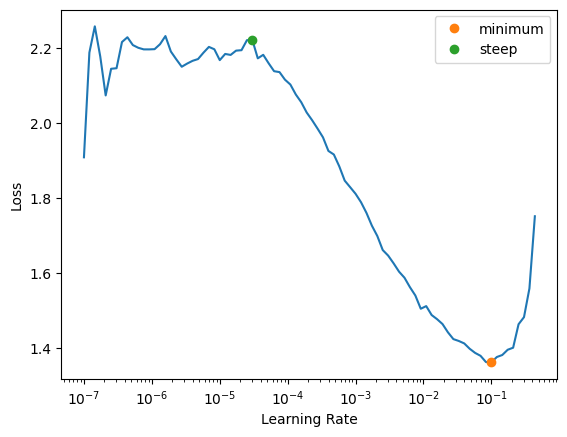

In [29]:
print("\nRunning LR finder for frozen model (training only final layer):")
frozen_lr = learn.lr_find(suggest_funcs=(minimum, steep), show_plot=True)

In [30]:
print(f"\nTraining only the final layer with lr = {frozen_lr.minimum:.2e}")
learn.fit_one_cycle(3, frozen_lr.minimum)


Training only the final layer with lr = 1.00e-02


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.630317,0.361952,0.122592,0.877408,00:51
1,0.356944,0.299846,0.066550,0.933450,00:51
2,0.207684,0.152002,0.049037,0.950963,00:51


In [31]:
learn.unfreeze()


Running LR finder for unfrozen model:


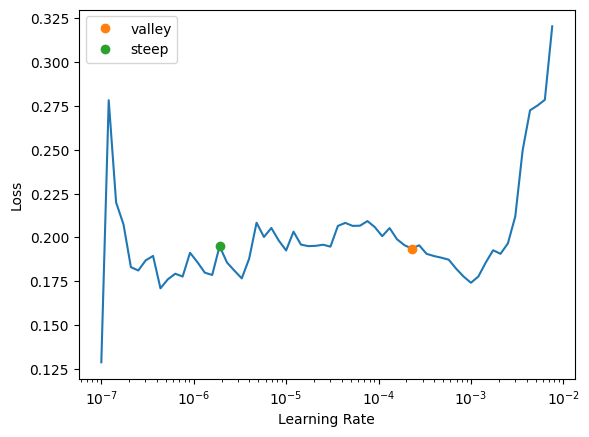

In [32]:
print("\nRunning LR finder for unfrozen model:")
unfrozen_lr = learn.lr_find(suggest_funcs=(valley, steep), show_plot=True)

In [33]:
chosen_lr = unfrozen_lr.steep / 10
print(f"\nTraining all layers with lr={chosen_lr:.2e}:")
learn.fit_one_cycle(6, chosen_lr)


Training all layers with lr=1.91e-07:


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.200926,0.146988,0.052539,0.947461,01:01
1,0.179641,0.146639,0.048161,0.951839,01:01
2,0.190974,0.151137,0.044658,0.955342,01:01
3,0.172129,0.149582,0.046410,0.953590,01:01
4,0.202341,0.152290,0.053415,0.946585,01:01
5,0.187167,0.187331,0.045534,0.954466,01:00


In [34]:
# Early layers: lower learning rate
# Later layers: higher learning rate
lower_lr = unfrozen_lr.valley / 100
higher_lr = unfrozen_lr.valley / 10

print(f"\nUsing discriminative learning rates:")
print(f"- Early layers (general features): {lower_lr:.2e}")
print(f"- Later layers (specific features): {higher_lr:.2e}")


Using discriminative learning rates:
- Early layers (general features): 2.29e-06
- Later layers (specific features): 2.29e-05


In [35]:
# Train with discriminative learning rates
learn.fit_one_cycle(5, lr_max = slice(lower_lr, higher_lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.173220,0.190647,0.051664,0.948336,01:02
1,0.165112,0.126528,0.042907,0.957093,01:01
2,0.168375,0.138035,0.042032,0.957968,01:01
3,0.154086,0.136697,0.038529,0.961471,01:01
4,0.146842,0.119207,0.040280,0.959720,01:01


In [36]:
learn.export('resnet50-brain-tumor-classifier.pkl')